In [158]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Data Cleaning

## Data Loading
We load the data, provided in `hw2-crowd-data.csv`

In [118]:
df_cars = pd.read_csv("hw2-crowd-data.csv")
df_cars.head()


,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot
0,Toyota,Corolla,Dealer,16799.0,2019,"Fernelius Toyota in Cheboygan, MI",61807.0,4,Silver (ext) & Black (int),Automatic,2T1BURHE0KC161295,1.8L I4 DOHC,"Front-wheel drive, CVT transmission, automatic...",https://www.ferneliustoyota.net/inventory/used...,https://drive.google.com/open?id=1zXCuz7PcqJZA...
1,Toyota,Rav4,Dealer,33999.0,2021,"Riverside Auto Mall in Marquette, MI",35988.0,4,Silver Sky (ext) & Black (int),Automatic,2T3A1RFV3MW173876,I-4 cyl,"All-wheel drive, lane assist, power moonroof, ...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1TtYkyqq7U6c1...
2,Toyota,Rav4,Dealer,36575.0,2021,"Riverside Toyota in Escanaba, MI",18177.0,4,Silver Sky (ext) & Gray (int),Automatic,2T3N1RFV3MC146163,I-4 cyl,"All-wheel drive, parking sensors, navigation s...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1wjIhrGArk56d...
3,Toyota,Rav4,Dealer,32999.0,2022,Riverside Chrysler Dodge Jeep Ram Escanaba in ...,23043.0,4,Midnight Black (ext) & Black (int),Automatic,2T3P1RFV5NW280956,I-4 cyl,"Lane assist, rear parking camera, auto highbea...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1R9Ejfpz6u2eU...
4,Toyota,Rav4,Dealer,26999.0,2021,"Riverside Auto Mall in Marquette, MI",52091.0,4,Gray (ext) & Black (int),Automatic,2T3P1RFV6MC246993,I-4 cyl,"Lane assist, rear parking camera, automatic hi...",https://www.riversidetoyotamarquette.com/certi...,https://drive.google.com/open?id=1o96XSGjg7Sia...


In [119]:
# what is the length of my dataframe?
len(df_cars)

458

In [120]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car Make              458 non-null    object 
 1   Car Model             457 non-null    object 
 2   Dealer or Individual  453 non-null    object 
 3   Price                 456 non-null    float64
 4   Year                  458 non-null    int64  
 5   Location              446 non-null    object 
 6   Mileage               449 non-null    float64
 7   Doors                 440 non-null    object 
 8   Color                 454 non-null    object 
 9   Transmission          455 non-null    object 
 10  VIN#                  452 non-null    object 
 11  Engine                444 non-null    object 
 12  Description           355 non-null    object 
 13  Web link              457 non-null    object 
 14  Screenshot            435 non-null    object 
dtypes: float64(2), int64(1)

In [121]:
df_cars.describe()


,Price,Year,Mileage
count,456.000000,458.000000,449.000000
mean,19543.037237,2182.868996,63945.059226
std,7872.730206,3212.603416,51108.670447
min,1000.000000,2006.000000,0.000000
25%,13996.500000,2014.000000,22320.000000
50%,18996.500000,2018.000000,58494.000000
75%,24800.500000,2021.000000,95000.000000
max,46461.000000,70378.000000,264997.000000


In [122]:
duplicates = df_cars.duplicated(subset=['VIN#'], keep='first') # Keep one instance for repeated VIN numbers

print(len(df_cars[duplicates]))# AS VIN is unique for each car, I would remove the duplicates based on this column.


df_cars = df_cars.drop_duplicates(subset=['VIN#'], keep='first')

print("Rows before removing duplicates:", len(df_cars))

print("No of Rows left: ", len(df_cars))


20
Rows before removing duplicates: 438
No of Rows left:  438


In [123]:

df_cars['Price'].fillna(df_cars['Price'].median(), inplace=True) # I noticed 456 entires(before missing value). So filling the missing values with median value

final_result= df_cars['Price'].notnull().sum()
final_result

438

In [124]:
door_mode = df_cars['Doors'].mode()[0]
df_cars['Doors'].fillna(door_mode, inplace=True) # filling most common value for doors which is 4

In [125]:
median_mileage = df_cars['Mileage'].median()
df_cars['Mileage'].fillna(median_mileage, inplace=True) # filling missing mileage with median value

In [126]:
mode_val = df_cars['Dealer or Individual'].mode()[0]
df_cars['Dealer or Individual'].fillna(mode_val, inplace=True) # filling missing dealer/individual with mode value

trans_val = df_cars['Transmission'].mode()[0]
df_cars['Transmission'].fillna(trans_val, inplace=True) # filling missing Transmission with mode value


In [127]:
df_cars['Location'].fillna('Unknown', inplace=True) # replacing unknown for location which is not specified
df_cars['Engine'].fillna('Not Specified', inplace=True)# replacing not specified for unknown engine

In [129]:
df_cars['Year'] = df_cars['Year'].astype(int)
df_cars['Price'] = df_cars['Price'].astype(float)

df_cars['Doors'] = pd.to_numeric(df_cars['Doors'], errors='coerce') # As all values are int, am converting the data type to int
df_cars['Doors'].fillna(door_mode, inplace=True) # To use the mode value if its null
df_cars['Doors'] = df_cars['Doors'].astype(int)


In [133]:
df_cars['Location'] = df_cars['Location'].str.upper().str.strip() # Normalizing the text values



In [138]:
df_cars['Color'] = df_cars['Color'].str.split('&', expand=True)[0]

df_cars['Color'] = df_cars['Color'].str.replace(r'\(ext\)', '', regex=True).str.strip() # Remove the ext substring if  exists and strip any whitespace


df_cars['Color'] = df_cars['Color'].str.title() # standardize to title case

In [155]:
df_cars['Car Age'] = 2024 - df_cars['Year'] # Adding a new column for better understanding of Car's age

In [154]:
df_cars.head()


,Car Make,Car Model,Dealer or Individual,Price,Year,Location,Mileage,Doors,Color,Transmission,VIN#,Engine,Description,Web link,Screenshot,Car Age
0,Toyota,Corolla,Dealer,16799.0,2019,"FERNELIUS TOYOTA IN CHEBOYGAN, MI",61807.0,4,Silver,Automatic,2T1BURHE0KC161295,1.8L I4 DOHC,"Front-wheel drive, CVT transmission, automatic...",https://www.ferneliustoyota.net/inventory/used...,https://drive.google.com/open?id=1zXCuz7PcqJZA...,5
1,Toyota,Rav4,Dealer,33999.0,2021,"RIVERSIDE AUTO MALL IN MARQUETTE, MI",35988.0,4,Silver Sky,Automatic,2T3A1RFV3MW173876,I-4 cyl,"All-wheel drive, lane assist, power moonroof, ...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1TtYkyqq7U6c1...,3
2,Toyota,Rav4,Dealer,36575.0,2021,"RIVERSIDE TOYOTA IN ESCANABA, MI",18177.0,4,Silver Sky,Automatic,2T3N1RFV3MC146163,I-4 cyl,"All-wheel drive, parking sensors, navigation s...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1wjIhrGArk56d...,3
3,Toyota,Rav4,Dealer,32999.0,2022,RIVERSIDE CHRYSLER DODGE JEEP RAM ESCANABA IN ...,23043.0,4,Midnight Black,Automatic,2T3P1RFV5NW280956,I-4 cyl,"Lane assist, rear parking camera, auto highbea...",https://www.riversidetoyotamarquette.com/used/...,https://drive.google.com/open?id=1R9Ejfpz6u2eU...,2
4,Toyota,Rav4,Dealer,26999.0,2021,"RIVERSIDE AUTO MALL IN MARQUETTE, MI",52091.0,4,Gray,Automatic,2T3P1RFV6MC246993,I-4 cyl,"Lane assist, rear parking camera, automatic hi...",https://www.riversidetoyotamarquette.com/certi...,https://drive.google.com/open?id=1o96XSGjg7Sia...,3


In [156]:
df_cars['Price'].describe()


count      438.000000
mean     19706.458858
std       7849.876282
min       3900.000000
25%      13998.250000
50%      19425.500000
75%      24936.750000
max      46461.000000
Name: Price, dtype: float64

In [157]:
df_cars['Mileage'].describe()

count       438.000000
mean      64350.798157
std       50654.056348
min           0.000000
25%       23076.000000
50%       58494.000000
75%       94865.000000
max      264997.000000
Name: Mileage, dtype: float64

In [163]:
correlation = df_cars[['Price', 'Mileage']].corr() # understanding the correlation between price and mileage columns
print(correlation)

            Price   Mileage
Price    1.000000 -0.695399
Mileage -0.695399  1.000000


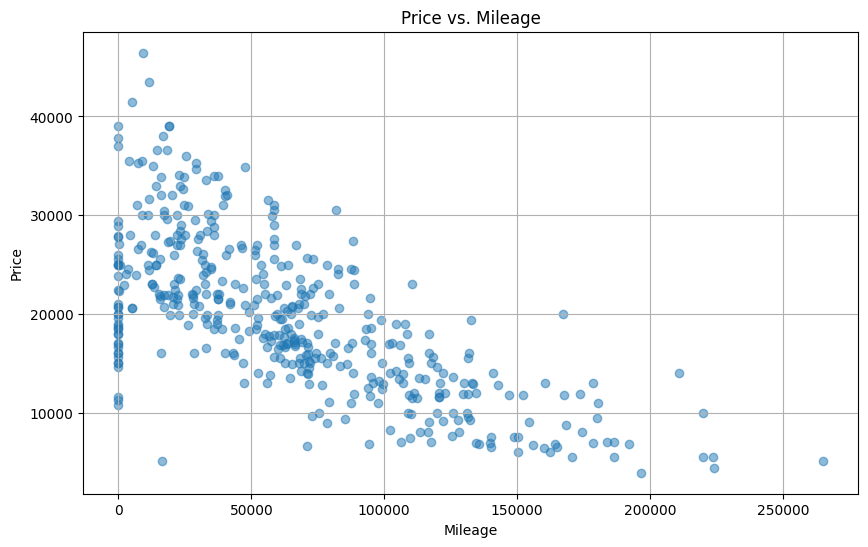

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cars['Mileage'], df_cars['Price'], alpha=0.5)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show() # indicates the negative correlation between price and mileage

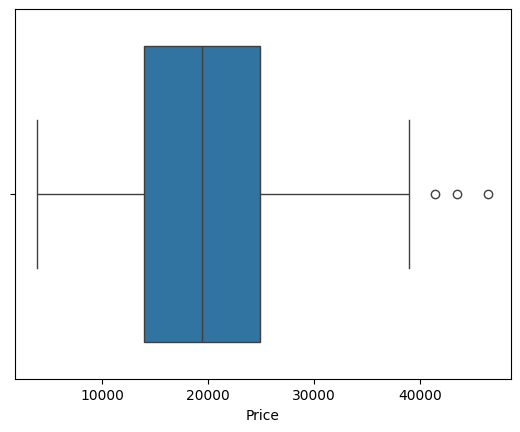

In [164]:
sns.boxplot(x=df_cars['Price']) #median price around $20,000
plt.show() #Interquartile range approximately from $14,000 to $25,000

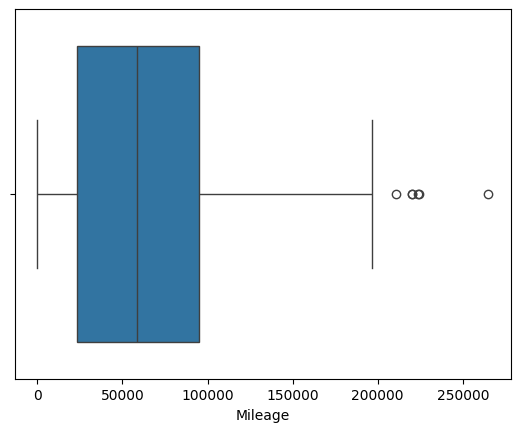

In [165]:
sns.boxplot(x=df_cars['Mileage']) #median mileage around 60,000 miles
plt.show()#Interquartile range appx from 23,000 to 95,000

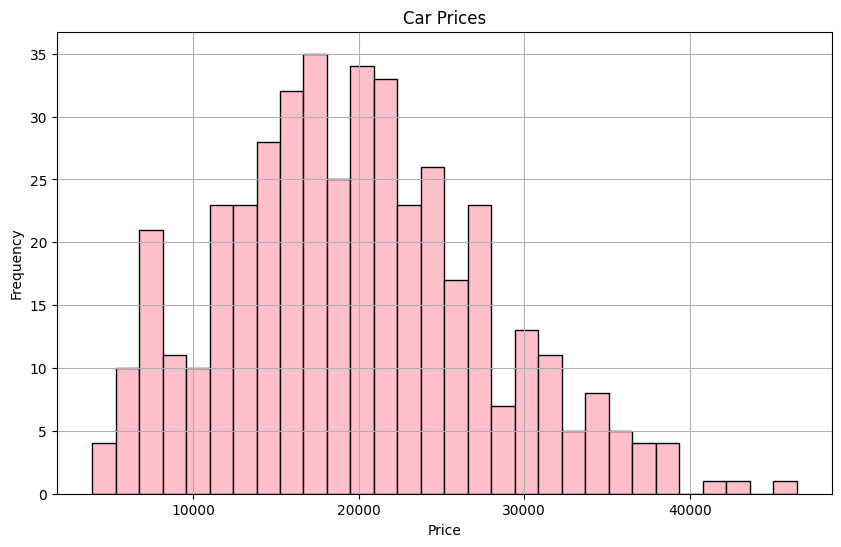

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(df_cars['Price'], bins=30, color='pink', edgecolor='black')
plt.title('Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data Cleaning
You need to clean the rows and columns of data using Pandas.  Insert the code (and descriptions of the code in markdown) in this subsection.

## Export Cleaned Data
Save the output of your data cleaning to `hw2-clean-data.csv`

In [174]:
df_cars.to_csv("hw2-clean-data.csv")

# Part 2:  Exploratory Data Analysis
At a minimum, the EDA should include looking at some summary statistics, recognizing any issues with the data or key insights, and visual inspection of important data columns. We expect at least 3 visualizations.

In [175]:
df_cars.describe()

,Price,Year,Mileage,Doors,Car Age
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,19706.458858,2190.436073,64350.798157,72.904110,-166.436073
std,7849.876282,3285.095808,50654.056348,1441.960404,3285.095808
min,3900.000000,2006.000000,0.000000,2.000000,-68354.000000
25%,13998.250000,2014.000000,23076.000000,4.000000,3.000000
50%,19425.500000,2018.000000,58494.000000,4.000000,6.000000
75%,24936.750000,2021.000000,94865.000000,4.000000,10.000000
max,46461.000000,70378.000000,264997.000000,30182.000000,18.000000


# Part 3: Question

Pose a question that you believe can be answered from the data. This should be in a clearly identified section in the same notebook.

# **How does the mileage of a car affect its sale value across different cars?**

# Part 4: Reflection

Insert here a reflection of your process. Did you feel you did the most efficient process to clean the dataset? Would your process be repeatable if you got a new dataset regularly with additional listings, or would it require much manual effort with each effort? Do you feel you adequately explored the dataset?   Do you feel your question is a good data science question (e.g. answerable, interesting, and at the right granularity).  

This section will not influence your grade on the above sections, so please feel free to be honest.

## First when I saw this dataset, it was pretty much interesting because its not some random datset we took from somewhere. Its the same dataset you have collected through the form from our class. As far as the cleaning is concerned, I feel like I have done well  with handling missing values, duplicates and especially with text data like the color column. The texts were so long that I simplified using a regex pattern. If I get a new dataset, almost all methods would work except for the text data. Cause I have specified according to how the text data is framed. I think I should find more ways for the location and description. Because those values were quite different for every user. I could not simplify with any pattern. Even for the location, some people have written just city and some have mentioned specific places. So Maybe I should find a way to simplify that column. The question I framed could be answered through my visualization and insights.